In [3]:
# Require python 3.8
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

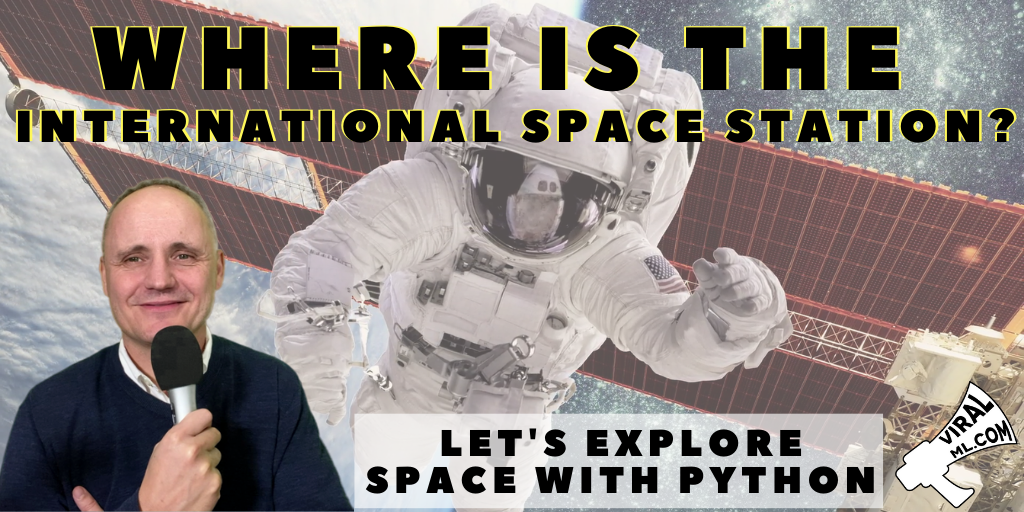

In [4]:
Image(filename='explore-space-with-python.png', width='80%')

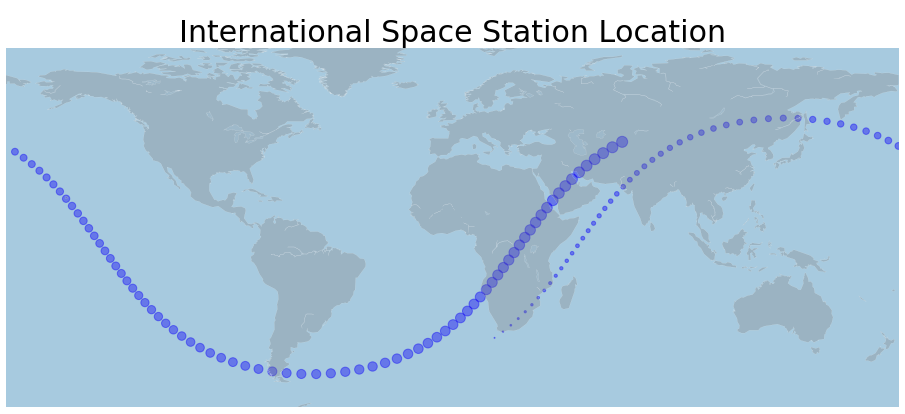

In [5]:
Image(filename='overlap-journey-iss.png', width='80%')

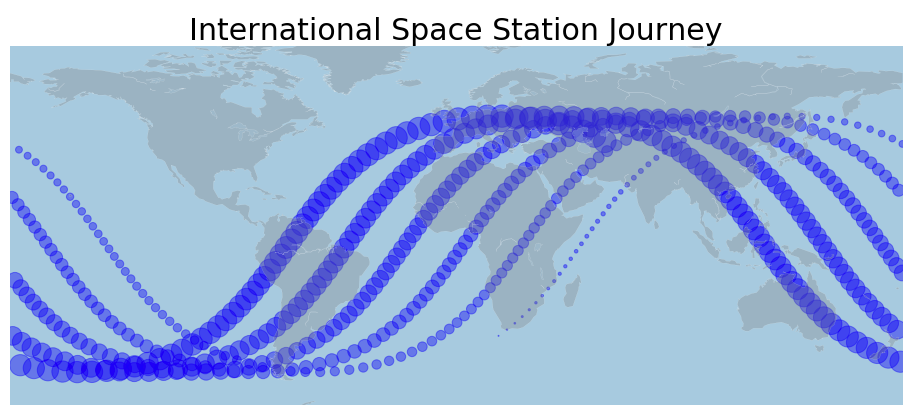

In [6]:
Image(filename='iss-multiple-orbits-around-the-earth.png', width='80%')

### ISS Live feed
https://www.nasa.gov/multimedia/nasatv/iss_ustream.html


Where is the International Space Station right now? Who is on board right now? Can we see what is going on up there right now?

The answers are yes, yes and yes. And you probably already know this as this all very poplar stuff.

So, in this free UDemy class

I'll show how to locate the international space Station in realtime, in space using Python and a rest API call. A Rest API is nothing more than A function - something just like you would do in Python or any other programing language, except that function lives on the Internet.This means uou can call it anywhere while you're on a beach using your phone and you'll be able to get the information– It is that awesome.

We'll also use that rest API call to find out exactly who is onboard in the ISS right now - remember, the ISS is permanantely crewed!


Let me outline the class so you know all the cool stuff you're going to learn.

- We'll start by getting the names of the astraunots on board now, then we'll get the realtime location of the station and plot it on a good looking map wth the outline of each continent drawn so we can quickly recognize where it is.

- We'll then kick things up by creating a data collector function to collect data for however long you want (or how much patience you have) Remember, in data science, data is critical, just as fuel is critical to a rocket!

- Then we'll dig into some simple machine learning and look at two ways of forecasting the location of the space station, a very simple linear regression and something slightly more complex that better understands non-linear trajectories. nothing scary going on here.

- We'll then move all the things we've learned to the internet, we're going to port into a real web applications that you will be able to reach from anywhere around the world using GCP App Engine. There we will create a map in chartjs and plot the location of the ISS and a button to access the live ISS feed! to observe with the crew is up to right now.

### International Space Station Current Location
http://open-notify.org/Open-Notify-API/ISS-Location-Now/

The ISS programme is a joint project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada). The ownership and use of the space station is established by intergovernmental treaties and agreements.

The ISS serves as a microgravity and space environment research laboratory in which crew members conduct experiments in biology, physics, astronomy, and other fields.

Interesting facts
It was lauched over 2 decadeas on November 20th, 1998
It will operate up to 2030
It has two bathrooms, a gymnasium and a 360-degree bay window - wouldn't we all love to take a peek!
It orbits 15.5 perday... It flies at 4.791 miles per second. That's fast enough to go to the Moon and back in about a day.
Some 230 people have visited it,
It has a capactity for 6 people on board
They have to exercise some two hours a day to keep their muscles from atrophiating

# Who are the astronauts on board right now?

Go to: http://open-notify.org/


In [7]:
# Who is in space right now?
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'number': 3,
 'message': 'success',
 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'},
  {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
  {'craft': 'ISS', 'name': 'Ivan Vagner'}]}

# Where is the International Space Station right now?

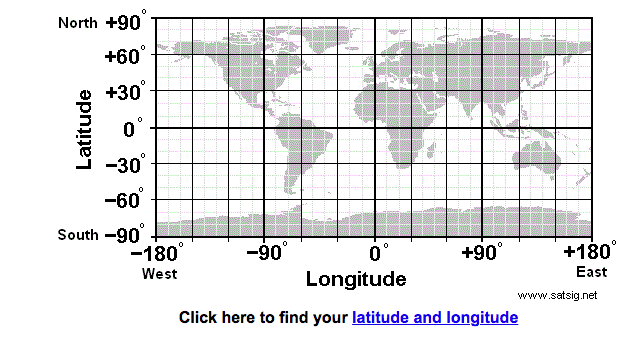

In [8]:
# http://www.satsig.net/lat_long.htm
Image(filename='satsig_explanation.png', width='60%')

In [9]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
space_station_location = r.json()
space_station_location

{'iss_position': {'latitude': '43.9297', 'longitude': '-163.7103'},
 'message': 'success',
 'timestamp': 1588956227}

In [10]:
space_station_location['timestamp']

1588956227

In [11]:
space_station_location['iss_position']

{'latitude': '43.9297', 'longitude': '-163.7103'}

In [12]:
space_station_location['iss_position']['latitude']

'43.9297'

In [13]:
# let's plot the ISS current location
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
# On Windows 10, go to https://www.lfd.uci.edu/~gohlke/pythonlibs/
# Download the Basemap version matchin your python version, for 3.8 -> basemap‑1.2.1‑cp38‑cp38‑win32.whl
# Put the whl file in the python directory C:\Users\lk_le\AppData\Local\Programs\Python\Python38-32
# run a cmd pointing to this directory: pip install basemap‑1.2.1‑cp38‑cp38‑win32.whl
from mpl_toolkits.basemap import Basemap

Text(0.5, 1.0, 'International Space Station Location')

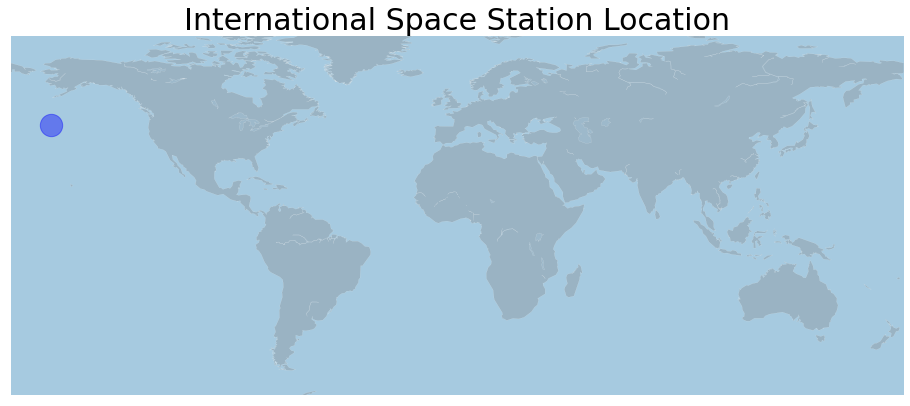

In [14]:
# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")


m.scatter(float(space_station_location['iss_position']['longitude']), 
          float(space_station_location['iss_position']['latitude']), 
          s=500, alpha=0.4,color='blue')

 
plt.title('International Space Station Location' , fontsize=30) 

# Collect data - try to let it run over
We know that it orbits 15.5 perday, so let it run at least 2 hours to collect enough data to see it go around the earth once.

In [15]:
# This piece of code get the real time and store in a string

import datetime
date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
date_to_print

'20200509004349'

In [ ]:
# Wait this cell to run 2hours to collect enough data, we pull 1 row per minute
record_data = True
if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    import time
    starttime=time.time()
    
    # List of locations with timestamp
    space_station_data = []
    while True: 
        # get the data from the API
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        # exctract the JSON dictionary
        space_station_location = (r.json())
        print(space_station_location)

        space_station_data.append([space_station_location['timestamp'],
                                space_station_location['iss_position']['latitude'],
                                space_station_location['iss_position']['longitude']
                                ])

        # dump copy to file
        # create a panda DF from the list
        tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
        tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
        
        # safety break, break the while true after 5 hours
        if len(space_station_data) > 18000:
            break
            
        # let it sleep 60 seconds
        # https://stackoverflow.com/questions/474528/what-is-the-best-way-to-repeatedly-execute-a-function-every-x-seconds-in-python
        time.sleep(60.0 - ((time.time() - starttime) % 60.0))

# Visualize the historical data

In [25]:
# load historical data
iss_flight_record = pd.read_csv('ISS_location_20200501164944.csv')
iss_flight_record

,timestamp,latitude,longitude
0,1588322982,-47.7813,108.8134
1,1588323042,-49.1378,114.0420
2,1588323102,-50.2130,119.4992
3,1588323162,-51.0020,125.2315
4,1588323222,-51.4758,131.1281
...,...,...,...
203,1588335162,-32.0110,146.7677
204,1588335222,-29.3254,149.7718
205,1588335282,-26.5647,152.6064
206,1588335342,-23.7403,155.2943


### Convert timestamp and add an index

In [26]:
# translate timestamp into readable
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']] 

# add the date_time to a new column in our data frame iss_flight_record
iss_flight_record['date'] = date_time

# add an plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)
 
iss_flight_record.head()

,timestamp,latitude,longitude,date,index
0,1588322982,-47.7813,108.8134,2020-05-01 16:49:42,1
1,1588323042,-49.1378,114.0420,2020-05-01 16:50:42,2
2,1588323102,-50.2130,119.4992,2020-05-01 16:51:42,3
3,1588323162,-51.0020,125.2315,2020-05-01 16:52:42,4
4,1588323222,-51.4758,131.1281,2020-05-01 16:53:42,5


### Plot the data

Text(0.5, 1.0, 'International Space Station Location')

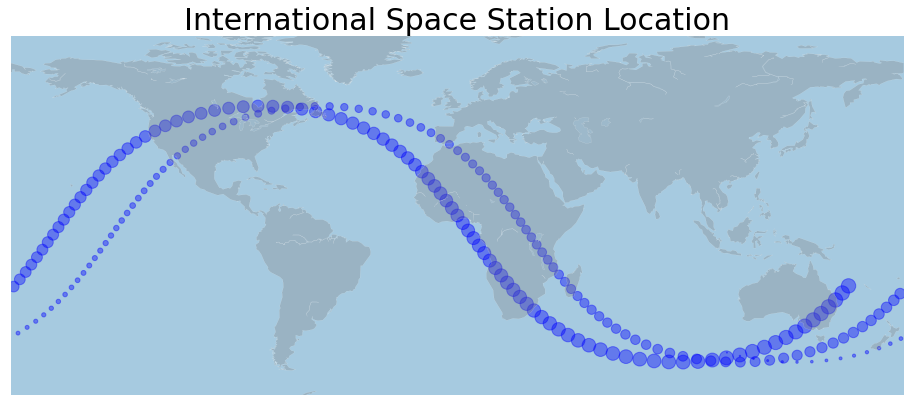

In [27]:
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")


m.scatter(iss_flight_record['longitude'], 
          iss_flight_record['latitude'], 
          s=iss_flight_record['index'] , alpha=0.4,color='blue')

 
plt.title('International Space Station Location' , fontsize=30) 

# Let's Model the ISS Data (Linear Regression)

In [29]:
# each dot represents one minute - can we predict where it will be in the next 10 minutes?
tmp_df = iss_flight_record.tail(10)
tmp_df

,timestamp,latitude,longitude,date,index
198,1588334862,-43.7433,128.4289,2020-05-01 20:07:42,199
199,1588334922,-41.6705,132.6388,2020-05-01 20:08:42,200
200,1588334982,-39.4356,136.5603,2020-05-01 20:09:42,201
201,1588335042,-37.0810,140.1851,2020-05-01 20:10:42,202
202,1588335102,-34.5866,143.5984,2020-05-01 20:11:42,203
203,1588335162,-32.0110,146.7677,2020-05-01 20:12:42,204
204,1588335222,-29.3254,149.7718,2020-05-01 20:13:42,205
205,1588335282,-26.5647,152.6064,2020-05-01 20:14:42,206
206,1588335342,-23.7403,155.2943,2020-05-01 20:15:42,207
207,1588335402,-20.8866,157.8353,2020-05-01 20:16:42,208


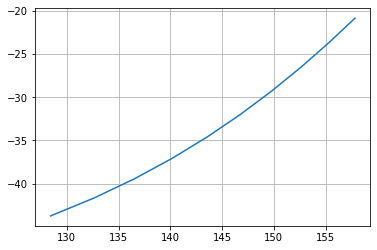

In [37]:
plt.plot(tmp_df['longitude'],tmp_df['latitude'])
plt.grid()

We want to predict the latitude with the longitude

# Simple Linear regression: scipy or scikitlearn

##### Method1: scipy

In [40]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)

intercept:  -145.3645545237762
slope:  0.7789780923688874


##### Method2: scikitlearn

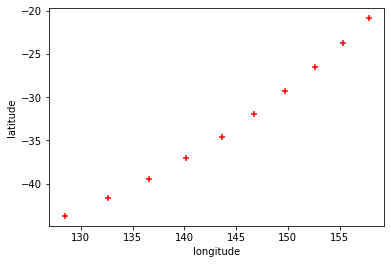

In [46]:
from sklearn import linear_model

# Anazlye the data
%matplotlib inline
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(tmp_df['longitude'],tmp_df['latitude'],color='red',marker='+')

In [53]:
# Split the data
feature=tmp_df[['longitude']]
feature=np.array(feature)

label=tmp_df[['latitude']]
label=np.array(label)

In [59]:
# Create a model
model = linear_model.LinearRegression()
# Fit the model
model.fit(feature,label)
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)
# Score the model
model.predict([[2020]])

intercept:  [-145.36455452]
slope:  [[0.77897809]]


In [64]:
#Predict
print(model.predict([[160]]))
print(model.predict([[170]]))
print(model.predict([[180]]))

[[-20.72805974]]
[[-12.93827882]]
[[-5.1484979]]


In [68]:

predicted_latitude=np.ceil(slope * 160 + intercept)

print('Next predicted point:', predicted_latitude)

predicted_latitude = np.ceil(slope * 170 + intercept)

print('Next predicted point:', predicted_latitude)

predicted_latitude = np.ceil(slope * 180 + intercept)

print('Next predicted point:', predicted_latitude)

predicted_latitude=[]
predicted_latitude.append(np.ceil(slope * 160 + intercept))
predicted_latitude.append(np.ceil(slope * 170 + intercept))
predicted_latitude.append(np.ceil(slope * 180 + intercept))


Next predicted point: -20.0
Next predicted point: -12.0
Next predicted point: -5.0


[-20.0, -12.0, -5.0]

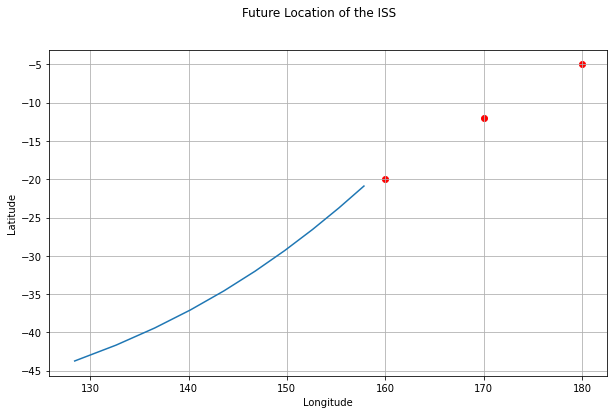

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([160,170,180], [predicted_latitude], color='red')

##### It doesnt match because we choose linear regression

# Polynomial Regression: numpy

In [88]:
x = tmp_df['longitude']
y = tmp_df['latitude']

poly_regression = np.poly1d(np.polyfit(x, y, 3))

print('Next predicted point:', poly_regression(160))
print('Next predicted point:', poly_regression(170))
print('Next predicted point:', poly_regression(180))

Next predicted point: -18.28153367266907
Next predicted point: -4.274748204309674
Next predicted point: 13.349490318249295


In [89]:
predicted_latitude=[]
predicted_latitude.append(poly_regression(160))
predicted_latitude.append(poly_regression(170))
predicted_latitude.append(poly_regression(180))

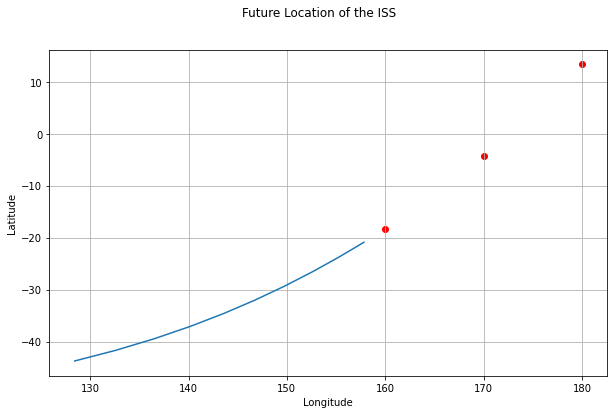

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([160,170,180], [predicted_latitude], color='red')

##### It is much better with degree 3

# Let's build this on the cloud!
Get yourself a free account at PythonAnywhere - choose the "Beginner: Free!". We will also add a button to the official ISS live feed - https://www.nasa.gov/multimedia/nasatv/iss_ustream.html

mysite
    ├── flask_app.py
    ├── world-map-backround.png
    └── templates 
            └── locate-the-iss.html

In [ ]:
#!/usr/bin/env python
from flask import Flask, render_template, flash, request, jsonify, Markup
import sys
import matplotlib
import matplotlib.pyplot as plt
import io, os, base64
import numpy as np
import requests

# global variables
app = Flask(__name__)

# get path directory
BASE_DIR = os.path.dirname(os.path.abspath(__file__))


# get the location of ISS
def get_space_station_location():

    space_station_longitude = None
    space_station_latitude = None
    try:
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        space_station_location = (r.json())

        space_station_longitude = float(space_station_location['iss_position']['longitude'])
        space_station_latitude = float(space_station_location['iss_position']['latitude'])

    except:
        # log error
        print('Request not working')
    return (space_station_longitude, space_station_latitude)


def translate_geo_to_pixels(longitude, latitude, max_x_px, max_y_px):
    # y = -90 to 90
    # x = -180 to 180
    scale_x = abs(((longitude + 180) / 360) * max_x_px)
    scale_y = abs(((latitude - 90) / 180) * max_y_px) # substract as y scale is flipped

    return scale_x, scale_y


@app.route("/", methods=['POST', 'GET'])
def ISS_Tracker():

    # set an initial plot size
    plt.figure(figsize=(16, 8))
    # load the image from web server
    img = os.path.join(BASE_DIR, 'world-map-backround.png')
    img = plt.imread(img)
    img = plt.imshow(img)

    if request.method == 'POST':
        # get the location of the ISS
        iss_location = get_space_station_location()
        # translate the geo-coordinates to pixels
        translated_iss_location = translate_geo_to_pixels(
            iss_location[0],
            iss_location[1],
            2000, 1000)

        # add position to plot
        plt.scatter(x=[translated_iss_location[0]], y=[translated_iss_location[1]],
                    c='blue', s=500, marker="P")

    plt.axis('off')
    img = io.BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()

    return render_template('locate-iss.html',
        forecast_plot = Markup('<img src="data:image/png;base64,{}" style="width:100%;vertical-align:top">'.format(plot_url))
        )




if __name__=='__main__':
    app.run(debug=True)